# **Predicting Housing Prices for King County Housing Authority**
## Eon Slemp, Dan Valenzuela

***




## **Overview** <a id="Overview"></a>

This project analyzes housing prices in King County, Washington for houses sold between May 2014 and May 2015. A model was created to predict housing prices so that King County Housing Authority can better understand how much their subsidies for housing may cost given features of a house. Specifically, this project used the data to predict price on homes based on their build density (e.g., whether they were urban or suburban), the number of people they could house, and the quality of life they can offer. 

[**1. Business Problem**](#Business-Problem)

[**2. Data Understanding**](#Data-Understanding)

[**3. Data Preparation**](#Data-Preparation)

[**4. Data Analysis**](#Data-Analysis)

[**5. Evaluation**](#Evaluation)

[**6. Conclusion and Next Steps**](#Conclusion)
***

## **Business Problem** <a id="Business-Understanding"></a>
[*↑ Back to overview*](#Overview)

<center><img src='images/AffordabilityGraph.png' width=600></center>

Affordability of housing in King County and surrounding areas has been progressively [declining](https://www.huduser.gov/portal/publications/pdf/SeattleWA-CHMA-19.pdf) since 2012. The King County Housing Authority has been tasked with understanding the housing market in order to effectively intervene. The purpose of this project is to help the Authority predict housing prices based on characteristics of homes they would prefer to subsidize. In effect, the model would allow the Authority to predict further how much a subsidy program may cost. 

With respect to the Authority's priority in understanding homes they would prefer to subsidize, the questions this project attempts to answer are:

  1. What is the relationship between a home's price and the number of people it can house?

  2. What is the relationship between a home's price and the quality of life it can offer?
  
  3. What is the relationship between a home's price and the size of the lot it is on?


[*↑ Back to overview*](#Overview)
***

## **Data Understanding** <a id="Data-Understanding"></a>
[*↑ Back to overview*](#Overview)

The dataset used in this project is from [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). It contains data about 27 thousand home sales in King County between May 2014 and May 2015. The home that sold at the lowest price of \\$78,000 dollars had 2 bedrooms, 1 bath, 780 square feet of living space, was built on a lot of 16,344 square feet, and had a grade of 5.

The home that sold at the highest price of $7.7 million had 6 beds, 8 baths, 12 thousand square feet of living space, built on a lot of 27.6 thousand square feet and had a grade of 13.

The homes in this dataset were also built between 1900 and 2015 according to the dataset, 87 and 38, respectively. However, given that one could realistically expect some homes to be built before 1900 and sold in 2015, it is possible for that this dataset has a "maximum" year when it comes to `yr_built`.

For the purposes of this analysis, the variables of interest are `price`, `bedrooms`, `sqft_lot`, `sqft_living`, and `grade` with `price` as the target variable and the rest being features. Given the business problem and questions set out, `bedrooms` acts as a measure how many people a house can hold; `sqft_lot` measures how densely the house can be built given that it measures how large the lot the house is built on; and `grade` and `sqft_living` help measure the quality of living of the house.

It should be noted that `grade` represents a grade provided by King County regarding the build quality of homes. More information can be found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) under "building grade". 

A sampling of the data can be seen below.


In [1]:
%load_ext autoreload
%autoreload 2
import CustomModule as cm

df_raw = cm.LoadHousingData(['price', 'bedrooms','sqft_living','grade','sqft_lot'], clean=False)['df']
df_raw.sample(5)

/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,price,bedrooms,sqft_living,grade,sqft_lot
4569,760000.0,4,3520,9,8095
6310,470000.0,4,1990,8,30083
10306,524000.0,3,2140,8,6720
15320,649500.0,3,3730,9,383328
10818,532000.0,5,3480,8,57499


The target variable `price` has, as seen below, a heavily-skewed distribution toward higher-priced homes. This may impact our modeling of `price` in that the higher-priced homes may be harder to predict given their lack of numbers. 


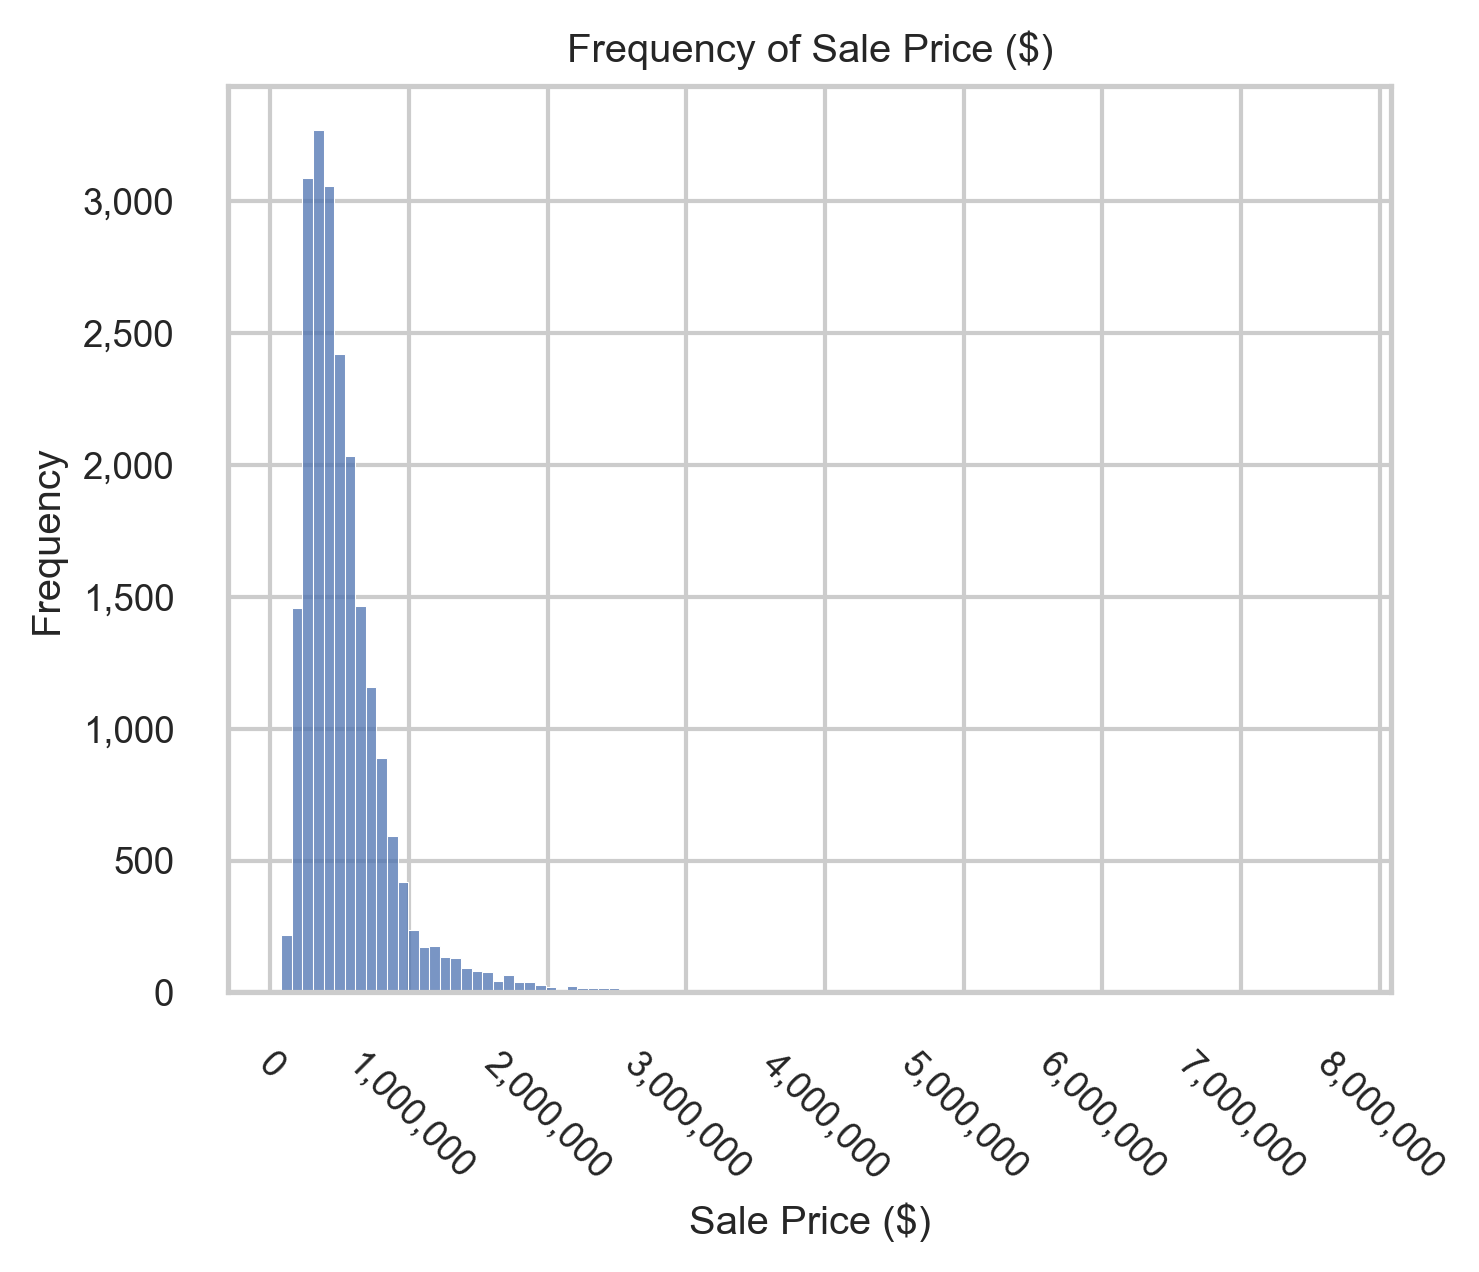

In [2]:
cm.PlotHist(df_raw, 'price', bins=100)

One can see the impact of `price`'s skew by examing scatter plots between it and variables of interest. For example, one can see in the scatter below that as `sqft_living` increase so does price but so does the variability of price.  

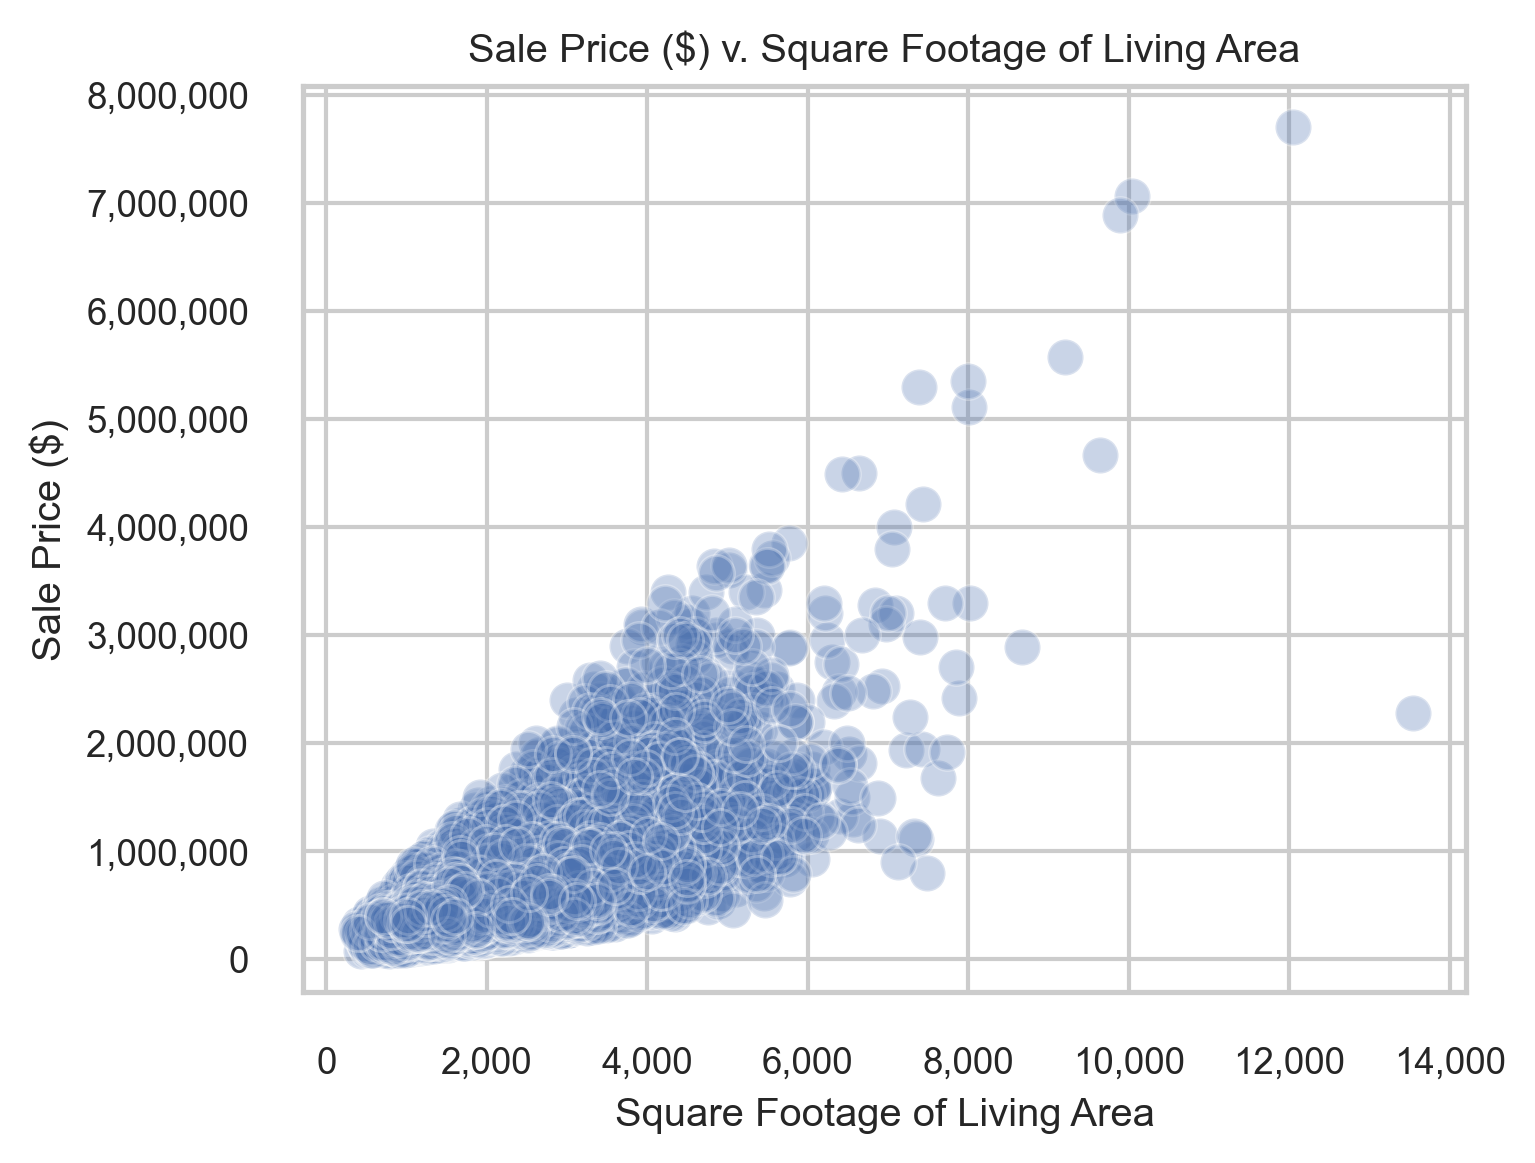

In [3]:
cm.PlotScatter(df_raw,
              xvar='sqft_living',
              yvar='price',
              )

Such a relationship is less clear with categorical variables like `grade`. As seen in the scatter below, the general trend of `price` increasing with `grade` can be seen along with an increase in variability of `price`. However, given that `grade` is categorical, this may introduce further discrepancies in predictions in the model.

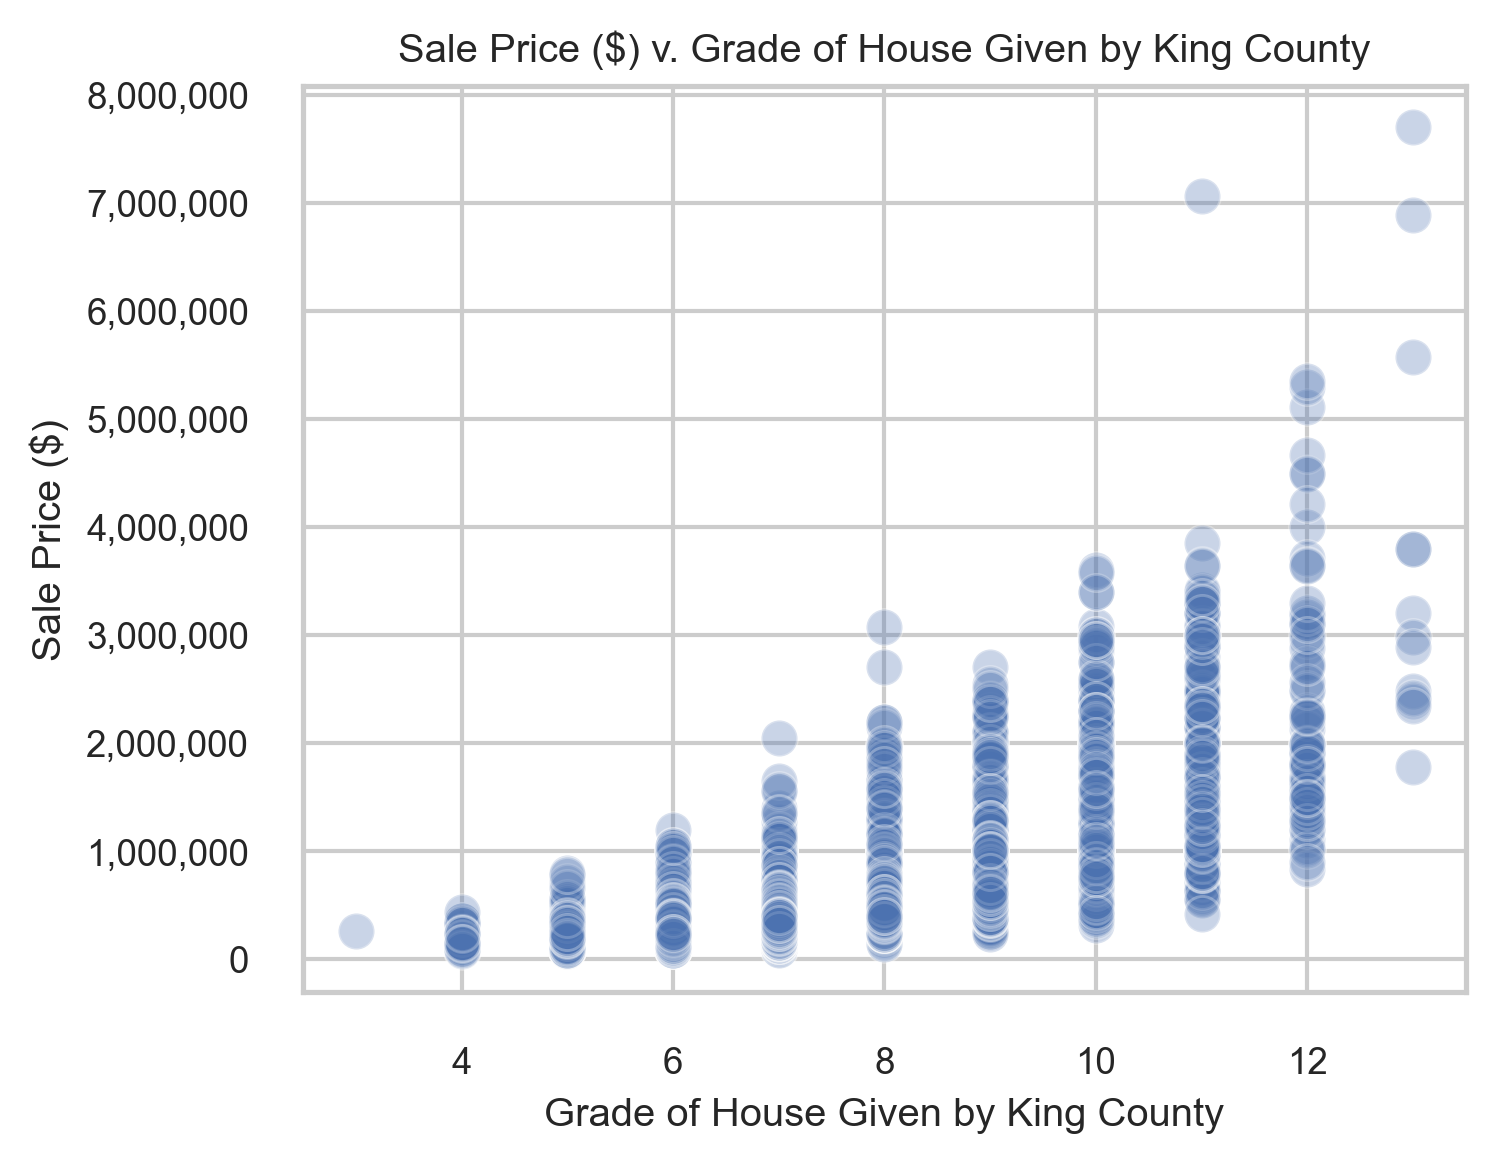

In [4]:
cm.PlotScatter(df_raw,
              xvar='grade',
              yvar='price',
              )

Lastly, `sqft_lot` as a whole does little to predict `price` as seen in the scatter plot below. However there seems to be a clear demarcation where `sqft_lot` no longer appears to be positively correlated with `price`. In such cases it seems that houses are likely in urban areas where space is a premium. Outside of urban areas, like suburbs and rural areas, space does not fetch as much of a `price` premium. Data preparation discusses the ways in which this relationship is dealt with.

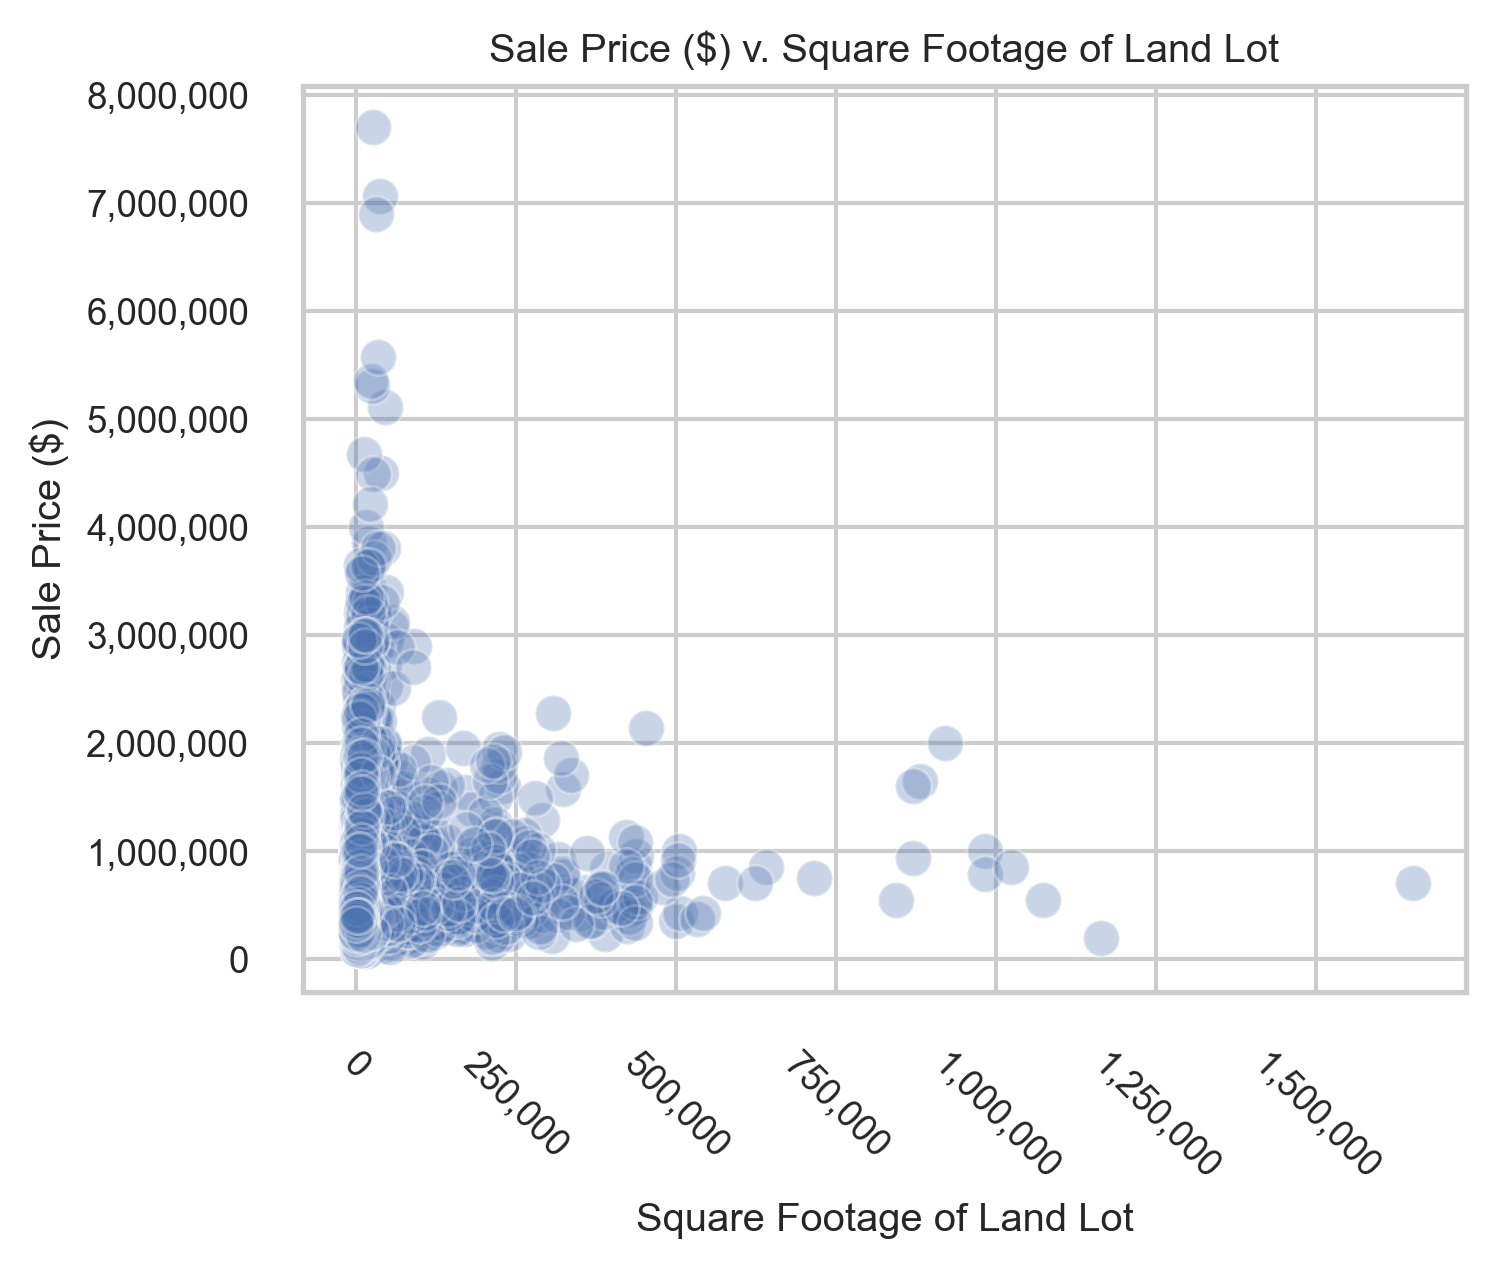

In [5]:
cm.PlotScatter(df_raw,
              xvar='sqft_lot',
              yvar='price',
              )

[*↑ Back to overview*](#Overview)
***

## **Data Preparation** <a id="Data-Preparation"></a>
[*↑ Back to overview*](#Overview)

In [6]:
df = cm.LoadHousingData(['price', 'bedrooms','sqft_living','grade','sqft_lot'], clean=True)

df['train_set'].sample(5)

,price,bedrooms,sqft_per_occupant,4,5,6,7,8,9,10,11,12,13,urban,suburban
20704,287450.0,3,480.000000,0,0,0,1,0,0,0,0,0,0,1,0
18223,591000.0,3,486.666667,0,0,0,1,0,0,0,0,0,0,1,0
7228,627000.0,5,714.000000,0,0,0,1,0,0,0,0,0,0,1,0
7121,630000.0,3,820.000000,0,0,0,0,0,1,0,0,0,0,0,1
9998,160000.0,3,353.333333,0,0,1,0,0,0,0,0,0,0,1,0


Above is a sample of the final cleaned dataset to produce our final model. As one can see, no transformations or changes were applied to `price` or `bedrooms`. However, `sqft_lot`, `grade`, and `sqft_living` had a number of operations performed to them.

First, `sqft_living` data was divided by `bedroom` to construct `sqft_per_occupant`. This was done to better approximate a variable that is related to quality of life. In this case, `sqft_per_occupant` can be interpreted as the amount of living space available for each occupant. 

Columns labeled as `4` through `13` are dummy variables for `grade`. `3` is excluded to be used as the reference category for the model. Using dummy variables the model will be able to tease out grades which are statistically significant for predicting price.

Finally, `sqft_lot` was binned into `urban` and `suburban` with `rural` as the reference category. `urban` contains homes with up to 8,000 square feet which is approximately 30 yards by 30 yards. 8,000 square feet is approximately the median of `sqft_lot`. This binning was necessary to account for the almost inverse relationship between `sqft_lot` and `price` seen above. 

After having transformed the variables, the dataset was split into a test set and a train set with the test set 20% of the whole dataset as seen below.

In [7]:
df['train_set'].shape

(17277, 15)

In [8]:
df['test_set'].shape

(4320, 15)

[*↑ Back to overview*](#Overview)
***

## **Data Analysis** <a id="Data-Analysis"></a>
[*↑ Back to overview*](#Overview)

### Baseline Model

In [9]:
df = cm.LoadHousingData(['price', 'bedrooms','sqft_living','grade','sqft_lot'], clean=False)
cm.BaselineModel(df['train_set'], 'price')

R-squared = 0.0 
 RMSE = 368605.64245939656


Above you can see a baseline regression of our `price` model. As expected R-squared is 0. RMSE in this case is 368,605.64 which can be interpreted as the baseline mean of `price`. As we create models, our predictions should improve and the regression should increase R-squared and RMSE, meaning that predicted values are closer to the true values of `price`.

### Model 1

The first model seen below uses our variables of interest to answer our business questions. As predicted, R-squared increased from our baseline model. This model is able to account for 54.1% of the variance in `price`. And as expected, most of the variables included have a positive coefficient, meaning that as each of the variables increase so does `price`.

However, the coefficient for `bedrooms` can be interpreted as saying that for every additional bedroom the `price` decreases by approximatley \$44,000. This may be a result of the fact that in the scatter of `price` v. `bedrooms` above you can see that price drastically begins to change as the number of bedrooms increase.

In any case, this model on average deviates from true values by about $250,000. In the context of the business problem, this may be insufficient to provide an accurate picture of subsidy costs.

In [10]:
cm.Models(df['train_set'], 'price')

R-squared = 0.5406025874898578 
 RMSE = 249836.70948439054


In [11]:
cm.Linreg(df['train_set'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5081.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:03   Log-Likelihood:            -2.3924e+05
No. Observations:               17277   AIC:                         4.785e+05
Df Residuals:                   17272   BIC:                         4.785e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.604e+05   1.69e+04    -27.282      0.000   -4.93e+05   -4.27e+05
bedrooms    -4.423e+04   2537.922    -17.428      0.000   -4.92e+04   -3.93e+04
sqft_living   222.2527      3.761     59.095      0.000     214.881     229.625
grade        9.053e+04   2550.685     35.493      0.000    8.55e+04    9.55e+04
sqft_lot       -0.3113      0.047     -6.595      0.000      -0.404      -0.219
==============================================================================
Omnibus:                    13368.417   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           761512.270
Skew:                           3.237   Prob(JB):                         0.00
Kurtosis:                      34.874   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 2

To account for potential issues with `bedroom`, `sqft_living` was divided by `bedroom` and `sqft_living` was removed. In doing so, the model can better account for cases where an increase in bedrooms may lead to a decrease in price (however, the multiplying by `sqft_living` confounds this a little). Further, `grade` was separated into dummy variables with grade `3` as the reference category.

The model improved in that `bedroom` finally had a coefficient that made more practical sense and what was seen in the data: the price of a house increases by approximately \$71,000 for every additional bedroom. Further, breaking down `grade` shows that a few lower grade cateogries do not have a statistically signifcant impact upon `price`. 

Overall, the model improved its ability to account for the variance in price by 2\% and its predictions deviated from true values by approximately \$8,000 less.

In [12]:
import pandas as pd

df['train_set']['sqft_per_occupant'] = df['train_set']['sqft_living'] / df['train_set']['bedrooms']

df['train_set'].drop(labels='sqft_living', axis=1, inplace=True)

# Dummy vars for grade excluding lowest grade
df_dummies = pd.get_dummies(df['train_set'].grade).iloc[:,1:]

# Combine grade dummy vars with df
df['train_set'] = pd.concat([df['train_set'],df_dummies], axis = 1)
        
cm.Models(df['train_set'], 'price')

R-squared = 0.5691773277011147 
 RMSE = 241941.99311908137


/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
cm.Linreg(df['train_set'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1754.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:03   Log-Likelihood:            -2.3869e+05
No. Observations:               17277   AIC:                         4.774e+05
Df Residuals:                   17263   BIC:                         4.775e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.377e+05   3.38e+05     -1.296      0.195    -1.1e+06    2.24e+05
bedrooms           7.192e+04   2264.479     31.761      0.000    6.75e+04    7.64e+04
grade              1.241e+05    3.2e+04      3.885      0.000    6.15e+04    1.87e+05
sqft_lot             -0.3268      0.046     -7.126      0.000      -0.417      -0.237
sqft_per_occupant   499.2303     12.208     40.894      0.000     475.301     523.159
4                 -1.832e+05   2.16e+05     -0.850      0.396   -6.06e+05     2.4e+05
5                 -3.169e+05   1.79e+05     -1.768      0.077   -6.68e+05    3.45e+04
6                 -4.238e+05   1.47e+05     -2.888      0.004   -7.11e+05   -1.36e+05
7                  -5.24e+05   1.15e+05     -4.560      0.000   -7.49e+05   -2.99e+05
8                 -5.775e+05   8.34e+04     -6.926      0.000   -7.41e+05   -4.14e+05
9                 -5.538e+05   5.24e+04    -10.566      0.000   -6.57e+05   -4.51e+05
10                -4.624e+05   2.43e+04    -19.003      0.000    -5.1e+05   -4.15e+05
11                -2.394e+05   2.31e+04    -10.360      0.000   -2.85e+05   -1.94e+05
12                 1.825e+05   5.31e+04      3.439      0.001    7.85e+04    2.86e+05
13                 1.534e+06   9.31e+04     16.484      0.000    1.35e+06    1.72e+06
==============================================================================
Omnibus:                    12159.094   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           581123.131
Skew:                           2.840   Prob(JB):                         0.00
Kurtosis:                      30.839   Cond. No.                     3.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model 3

Our final model shows that it is possible to account for 57.2\% of the variance in `price` without too much of an impact on adj. R-squared because of the additional variables created. By dividing `sqft_living` by `bedrooms`, creating dummy variables for `grade`, and binning `sqft_lot` into density bins, one can use the model to predict `price` with an RMSE of 241,262, a slight improvement from Model 2.

However, this model also shows that the `grade` categories may be less statistically-significant as previously thought. This will require more investigation as a scatter plot of this model including `grade` as a hue shows that there appears to be a relationship with `grade` that this model does not account for.

Generally the model shows that for each additional bedroom the price of a house increases by approximately \\$75,000; that for each additional square foot of living space per occupant increases the price by approximately $500; and that urban houses are almost twice as expensive as suburban houses.

In [14]:
df = cm.LoadHousingData(['price', 'bedrooms','sqft_living','grade','sqft_lot'], clean=True)
cm.Models(df['train_set'], 'price')

R-squared = 0.5715945605747841 
 RMSE = 241262.3018928967


In [15]:
cm.Linreg(df['train_set'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1645.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:04   Log-Likelihood:            -2.3864e+05
No. Observations:               17277   AIC:                         4.773e+05
Df Residuals:                   17262   BIC:                         4.774e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.369e+05   2.42e+05     -0.566      0.571   -6.11e+05    3.37e+05
bedrooms           7.453e+04   2278.599     32.709      0.000    7.01e+04     7.9e+04
sqft_per_occupant   512.1310     12.244     41.826      0.000     488.131     536.131
4                 -7.154e+04   2.46e+05     -0.291      0.771   -5.54e+05    4.11e+05
5                 -8.784e+04   2.42e+05     -0.363      0.717   -5.62e+05    3.87e+05
6                 -7.263e+04   2.41e+05     -0.301      0.764   -5.46e+05    4.01e+05
7                 -4.992e+04   2.41e+05     -0.207      0.836   -5.23e+05    4.23e+05
8                  1.951e+04   2.41e+05      0.081      0.936   -4.54e+05    4.93e+05
9                  1.679e+05   2.42e+05      0.695      0.487   -3.06e+05    6.41e+05
10                 3.888e+05   2.42e+05      1.609      0.108   -8.49e+04    8.63e+05
11                 7.371e+05   2.42e+05      3.045      0.002    2.63e+05    1.21e+06
12                 1.283e+06   2.44e+05      5.267      0.000    8.05e+05    1.76e+06
13                 2.754e+06   2.52e+05     10.935      0.000    2.26e+06    3.25e+06
urban              9.018e+04   8448.082     10.675      0.000    7.36e+04    1.07e+05
suburban           5.805e+04   8453.114      6.867      0.000    4.15e+04    7.46e+04
==============================================================================
Omnibus:                    12193.506   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           589999.266
Skew:                           2.848   Prob(JB):                         0.00
Kurtosis:                      31.056   Cond. No.                     2.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[*↑ Back to overview*](#Overview)
***

## **Evaluation**<a id="Evaluation"></a>
[*↑ Back to overview*](#Overview)

### Equal Variances and Normality of Errors

Looking at the graph produced below using our training set and testing set, one can see that the model produced on the training set does almost just as well with the test set with R-squared values being approximately equal and residuals being similar. However, looking at the residuals against the predicted values, one sees that the variance in residuals increases as `price` increases, meaning this model is heteroskedastic. 

Further, one sees that the errors are approximately normally distributed, meaning at least one of the assumptions of linear regression is met.

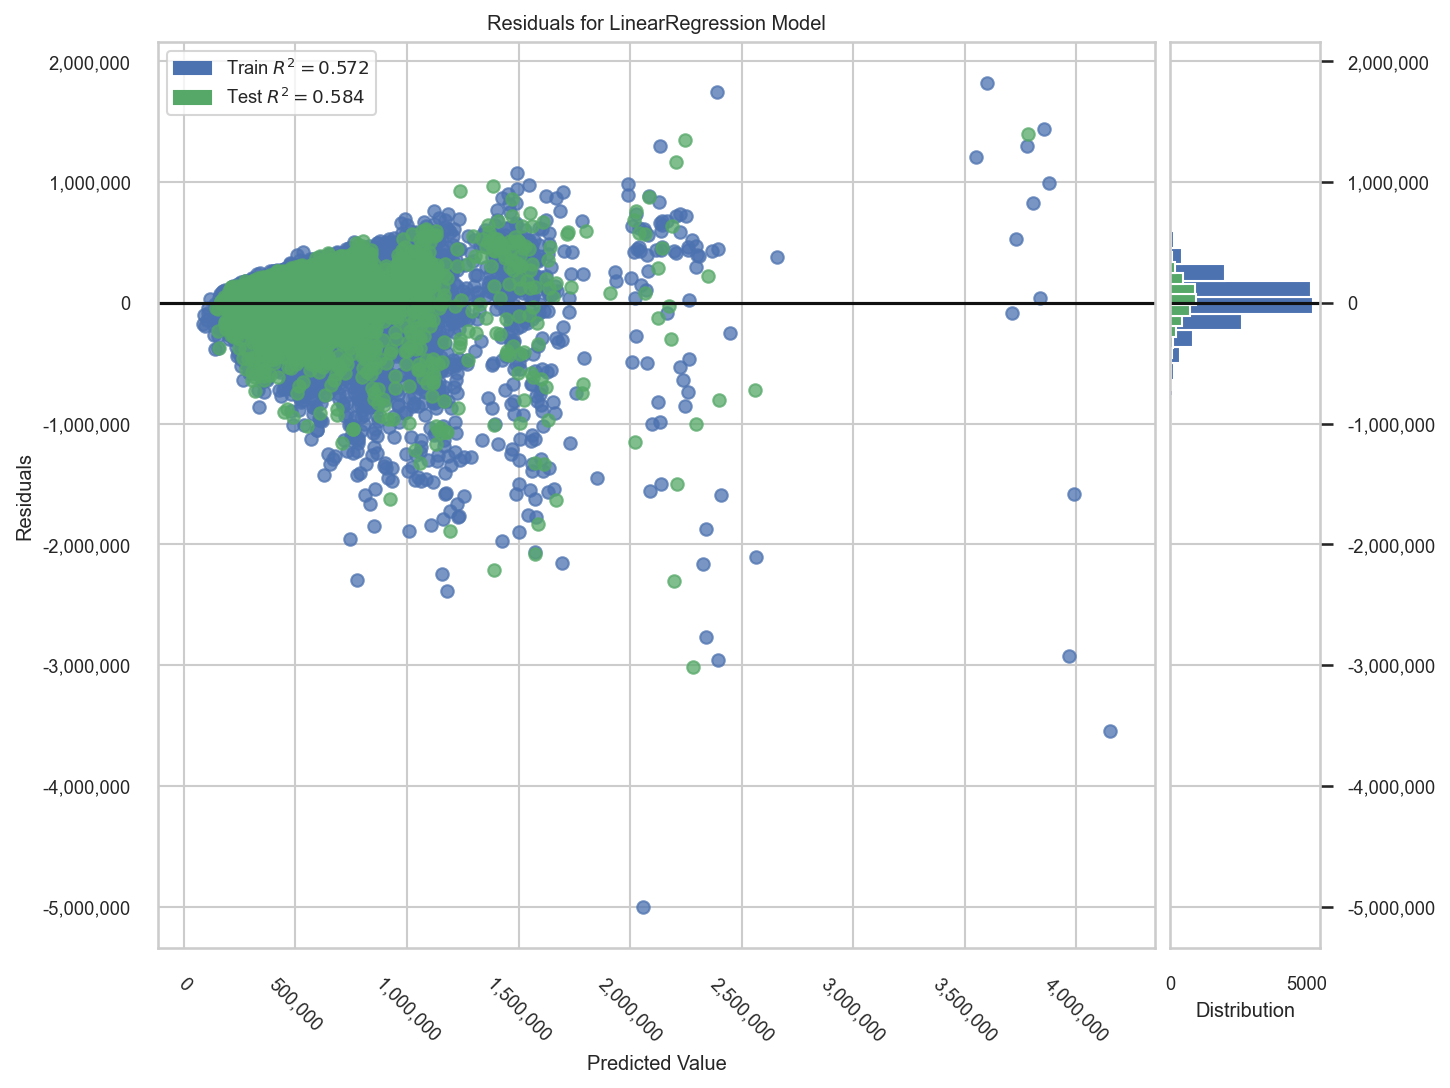

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
cm.Resid(df)

### Collinearity

With so many variables in the model, one would expect collinearity effects confounding the model. However, the highest correlation between variables is `sqft_per_occupant` and `bedrooms` because of the transformation we applied. Even then the correlation was at 0.58 which can be tolerated for the purposes of this model given our initial results in Model 1. 

/Users/danielvalenzuela/Documents/Flatiron/Repositories/phase2/KingCounty-Housing/CustomModule.py:236: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig.show()


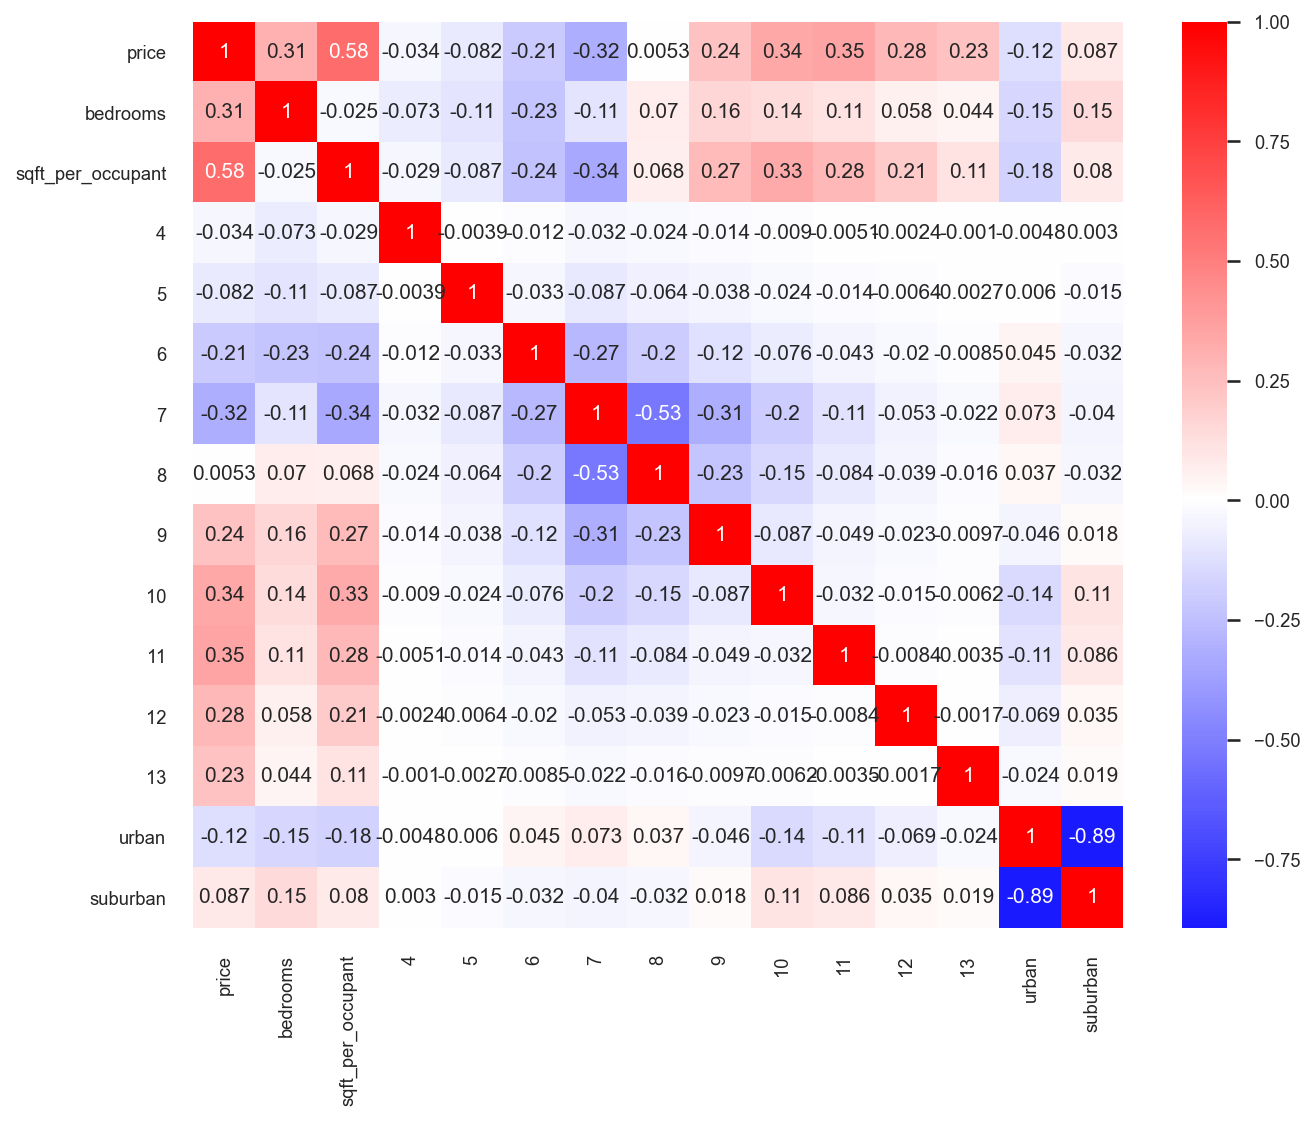

In [17]:
cm.CorrHeatmap(df['train_set'])

[*↑ Back to overview*](#Overview)
***

## **Conclusion and Next Steps**<a id="Conclusion"></a>
[*↑ Back to overview*](#Overview)

The pricing model developed here is able to predict price of homes in King County, Washington using bins of `sqft_lot`, `bedrooms` alone, and the constructed `sqft_per_occupant` and account for approximately 57\% of the variability in `price`. However, using dummy variables of `grade` did not provide statistically significant predictions of `price`. This means that our model can do a better job of modeling the effect of quality of life of a house on its price. 

King County Housing Authority can use this model in further understanding how much subsidies could cost based on housing prices, however `grade` variables would need to not be taken into account.

In terms of next steps, this model can be improved by providing additional transformations to the `grade` variable. As you can see in the graph below, grade seems to have a correlation with price at every grade level and that relationship will need to be teased out.

Further, the features of this model can be scaled to better compare the comparative effect of the variables on `price`. 

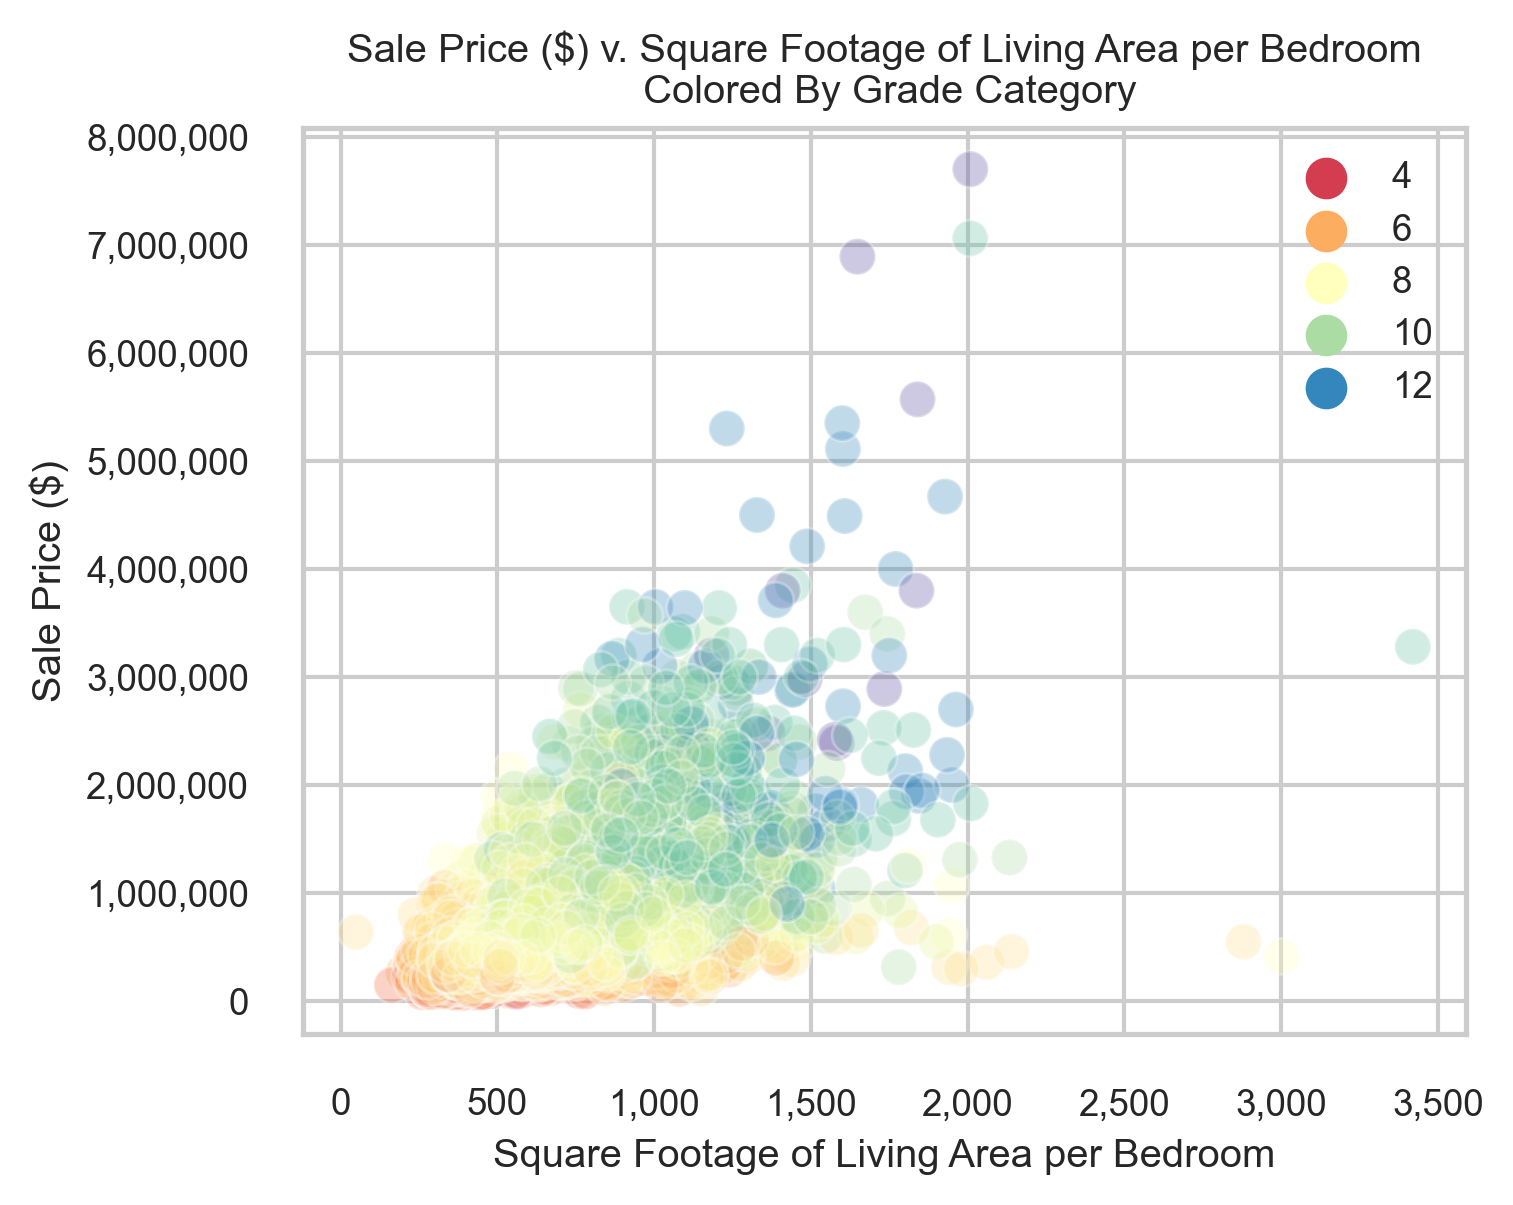

In [18]:
cm.PlotScatter(df['df'], 'sqft_per_occupant', 'price', hue='grade')

[*↑ Back to overview*](#Overview)
***